# Regression Walkthrough

The purpose of this section is to go through modeling data using python. This will involve two major sections, traditional regressions and machine learning.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import random as rd
from sklearn import metrics, linear_model, model_selection

# This is just to handle for a warning of copies of df's as opposed to working with the original.
# Read more here https://stackoverflow.com/questions/42105859/pandas-map-to-a-new-column-settingwithcopywarning/42106022
pd.options.mode.chained_assignment = None

In [4]:
pokemon_df=pd.read_csv('./data/pokemon_data.csv')

## Regressions

Regressions are a traditional statistical tool that is incredibly useful for take quantitative inputs and outputting a quantitative output. Most often this comes in the form of predicting behavior, which of course is why we're discussing them in modeling.

As a quick reminder from the stats notebook, here is a useful flowchart for determining which statistical tools to use. 

<img src="img/test_flowchart.png" alt="Testing Flow Chart" width="700"  style="float:left"/>

### Simple Regression

Simple linear regressions are the most well-known regression type. It simply attempts to understand the relationship between two variables, x (the input) and y (the output). As you can imagine, the simplicity of such a regression lends the regression to working with simple problems.

In our context of pokemon, let's plot the association between defense and special defense and generate a regression. In other words, given the normal defense stat of a particular pokemon, what is the special defense stat?

Text(0.5, 1.0, 'Defense vs. Sp. Def')

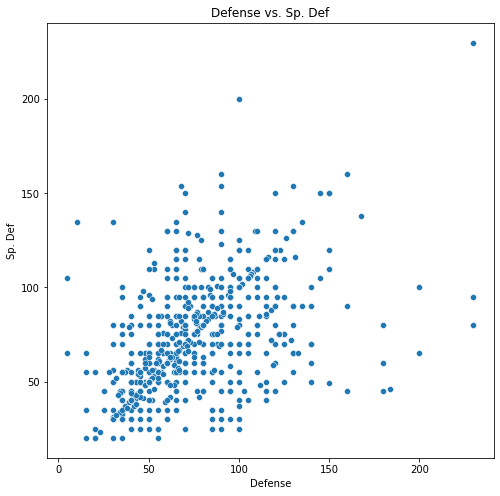

In [5]:
defense_df = pokemon_df[['Defense','Sp. Def']]

plt.figure(figsize=(8,8))
sns.scatterplot(data=defense_df, x='Defense', y='Sp. Def')
plt.title('Defense vs. Sp. Def')

As you can probably make out, it looks as if there is some straight line relationship to the Defense and Special Defense. However generate a regression and a few measures to evaluate how accurate the regression is. 


The formula of our regression is y=0.46x+38.24
The R Squared value of our regression is 0.51.
The P-value of our regression is 0.00.
The Root Mean Squared Error of our regression is 15.16
The Mean Absolute Error of our regression is 11.91.



<Figure size 576x576 with 0 Axes>

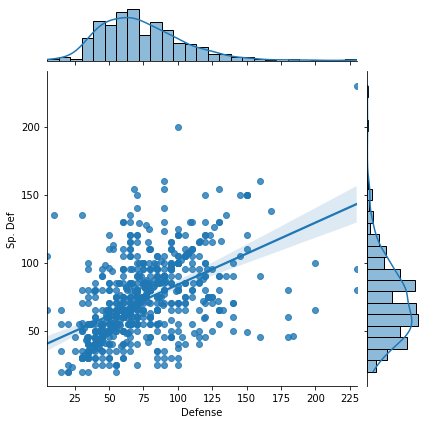

In [9]:
# fitting our model
simple_reg=stats.linregress(defense_df.loc[:,'Defense'], defense_df.loc[:,'Sp. Def'])

defense_df.loc[:,'Sp. Def Predicted']=defense_df['Sp. Def'].apply(lambda x : x*simple_reg.slope + simple_reg.intercept)
defense_df.loc[:,'Squared Error']=np.power((defense_df.loc[:,'Sp. Def']-defense_df.loc[:,'Sp. Def Predicted']),2)

plt.figure(figsize=(8,8))
sns.jointplot(data=defense_df, x='Defense', y='Sp. Def', kind='reg')

print('\nThe formula of our regression is y={:.2f}x+{:.2f}'.format(simple_reg.slope, simple_reg.intercept))
print('The R Squared value of our regression is {:.2f}.'.format(simple_reg.rvalue))
print('The P-value of our regression is {:.2f}.'.format(simple_reg.pvalue))
print('The Root Mean Squared Error of our regression is {:.2f}'.format(np.power(np.mean(defense_df['Squared Error']),.5)))
print('The Mean Absolute Error of our regression is {:.2f}.\n'.format(metrics.mean_absolute_error(defense_df['Sp. Def'],
                                                                                                     defense_df['Sp. Def Predicted'])))


An R Squared value of 0.51 is fairly interesting. Remember that an R squared value should be interpreted as "R percent of the variability in y can be explained by the variability in x". Additionally, the p-value can be of note. The null hypothesis in this instance is that the coefficient of our model is zero, as in there is no relationship. Additionally, we have a root mean squared error here of about 15, meaning that approximately we can expect a plus or minus 15 points for each value we predict. Mean absolute error is another common metric for evaluating the accuracy of a model, and generally will be fairly close to what our model shows. 

As you can imagine, there is a lot of room for improvement in terms of sophistication in modeling.

### Multiple Linear Regressions

We can expand on the simple linear regression by doing what's called a multiple linear regression. This is functionally the same process as above, however we are now allowing for mutliple independent variables. This still results in a linear model.

In this context, we're now predicting special defemse by taking in to account the pokemon's defense and special attack stats. 


The formula for our regression is Sp. Defence = 0.37*Defence + 0.35*Sp. Attack + 18.77.
The R Squared value of our regression is 0.42.
The Root Mean Squared Error of our regression is 21.13.



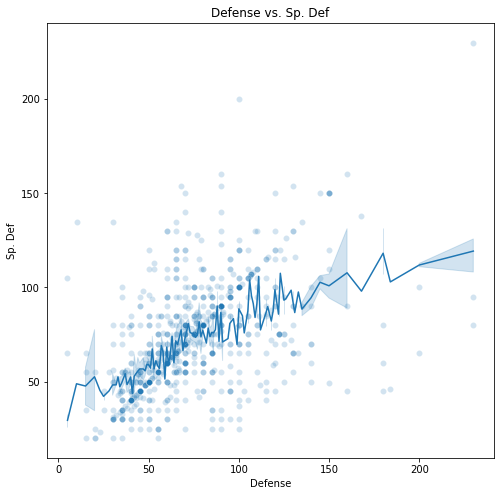

In [10]:
defense_df = pokemon_df[['Defense','Sp. Atk','Sp. Def']]

X=defense_df[['Defense','Sp. Atk']].to_numpy()
y=defense_df['Sp. Def'].to_numpy()

multi_reg=sk.linear_model.LinearRegression()
multi_reg.fit(X,y)

y_pred=multi_reg.predict(X)
defense_df.loc[:,'Sp. Def Predicted']=y_pred
defense_df.loc[:,'Squared Error']=np.power((defense_df.loc[:,'Sp. Def']-defense_df.loc[:,'Sp. Def Predicted']),2)

plt.figure(figsize=(8,8))
sns.scatterplot(data=defense_df, x='Defense', y='Sp. Def', alpha=.2)
sns.lineplot(data=defense_df, x='Defense', y='Sp. Def Predicted')
plt.title('Defense vs. Sp. Def')

print('\nThe formula for our regression is Sp. Defence = {:.2f}*Defence + {:.2f}*Sp. Attack + {:.2f}.'.format(multi_reg.coef_[0],
                                                                                                            multi_reg.coef_[1],
                                                                                                            multi_reg.intercept_))
print('The R Squared value of our regression is {:.2f}.'.format(multi_reg.score(X,y)))
print('The Root Mean Squared Error of our regression is {:.2f}.\n'.format(np.power(np.mean(defense_df['Squared Error']),.5)))


As you can see, the variability of the regression is all over the place, as obviously we're not seeing the third dimension of the special attack stat. This is what is driving the jagged trend line. 

Additionally, note that the R Squared value of this model and the root mean squared error are actually worse than our simple linear model. This goes to show that increasing model complexity is not always a gaurantee of increasing model accuracy. Playing with which features should go into a model is a necessary part of designing an accurate model. 

In [11]:
# sklearn has a function for qucickly evaluating mean square error 
print(np.power(sk.metrics.mean_squared_error(defense_df['Sp. Def'], defense_df['Sp. Def Predicted']),.5))

21.133759161206385


## Training and Test Datasets

I'm gonna take a second to talk about splitting up your datasets. When creating models, it is very intuitive to think that we should pass through all of our data to create a good model. However, we must be wary of a concept known as overfitting. Overfitting is when you fit your model too well to the data we have presently, but the model fails to predict the underlying trend when introduced to new data. Therefore, we should always take a subset of data to train our model on. 

So what should we do with the other half the model isn't trained on? This will be used as our test dataset. This is the dataset that will be used to evaluate the efficacy of our model. That way, we can truly have an understanding of how well our model is picking up the underlying trends. The concepts of overfitting and splitting your data out are not that relevant with simple linear regressions. However, the become increasingly important as model complexity increases.

In [14]:
# Sklearn also has defined function for doing this for us 
# train_size is a float to tell how much should be reserved
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=.8, random_state=5)

# Let's reevaluate the multiple linear analysis with the split up data 

multi_reg.fit(X_train, y_train)

# Predicting y_values
y_pred=multi_reg.predict(X_test)

# Evaluating RMSE
print('\nRMSE of the Test Data Set is {:.2f}.\n'.format(np.power(sk.metrics.mean_squared_error(y_test, y_pred),.5)))


RMSE of the Test Data Set is 21.71.



Notice how the RMSE has changed slightly. Obviously, some of this is due to random noise. However, once again, as more complexity is introduced in to the model. The potential for overfitting is always present. 

Another concept I'll briefly mention is the concept of cross-validating. Cross validating is simply rotating out which data is used as the training data set and which is the testing data, such that every data point is a training point once and a testing point once. You would then evaluate the mean average error and across all the rotations. 

### Non-Linear Regressions

### Regression Evaluation and Optimization

Logistic regressions are intended for use of binary classification. That is to say you feed in quantitative values into the regression and then you spit out a binary yes or no. So for our pokemon status, let's try to predict whether or not a pokemon is a legendary by feeding in it's base stats.

In [49]:
log_reg= linear_model.LogisticRegression(random_state=10)

leg_df = pokemon_df[['HP','Attack','Defense','Sp. Atk','Sp. Def', 'Speed','Legendary']]

X=leg_df[['HP','Attack','Defense','Sp. Atk','Sp. Def', 'Speed']].to_numpy()
y=leg_df['Legendary'].to_numpy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=.8,random_state=5)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [51]:
# Evaluating our model intuitively

test_df=pd.DataFrame(X_test, columns=['HP','Attack','Defense','Sp. Atk','Sp. Def', 'Speed'])

test_df['Legendary Actual']=y_test

y_pred=log_reg.predict(X_test)

test_df['Legendary Predicted']=y_pred

test_df.loc[(test_df['Legendary Actual']==True)].head()


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary Actual,Legendary Predicted
33,80,90,80,130,110,110,True,True
44,106,190,100,154,100,130,True,True
51,125,120,90,170,100,95,True,True
75,80,75,150,75,150,50,True,False
93,125,170,100,120,90,95,True,True


In [52]:
# Now lets look at truuly how accurate the model was with a confusion matrix

conf=metrics.confusion_matrix(y_test, y_pred, labels=[True, False])

conf_df=pd.DataFrame(conf, columns=['True Predicted','False Predicted'], index=['True Actual', 'False Actual'])

conf_df

,True Predicted,False Predicted
True Actual,8,5
False Actual,5,142


As you can see, we're acually pretty decent a correctly identifying non-legendary pokemon. Let's go ahead and normalize this to make it a bit more readable.

In [53]:
conf_norm=metrics.confusion_matrix(y_test, y_pred, labels=[True, False], normalize='true')

conf_norm_df=pd.DataFrame(conf_norm, columns=['True Predicted','False Predicted'], index=['True Actual', 'False Actual'])

conf_norm_df

,True Predicted,False Predicted
True Actual,0.615385,0.384615
False Actual,0.034014,0.965986


This confusion matrix represents a normalized view which presents the "Actual" rows as a percentage of total. So in this context, when we have an actual non-legendary pokemon, we are 97% accurate in identifying it as such. However, on the other hand, if we have an actual Legnedary, we are only 62%. Now it's important to keeps two things in mind; we have a relatively small sample size of legendarys (as obviously they are rare) and we need to think about our context. 

Taking the second point, we need to think about which we care about more. Do we care about correctly identifying Legendary pokemon? If so, then our model could use some work. Are we interested in the converse? Then we're on the right track. 

Additionally, lgistic regression can take in weightings to influence predictions that are rare in these circumstances. So for context, we could effectively force our model to predict True more often, thus likely increasing our correct legendary predictions at the expense of our accuracy of false predictions. In other words, our True Actual X True Predicted value will go up in addition to our False Actual X True Predicted going up as well. 